# 유사 이미지 검출 샘플모델 데모
DNN기반 이미지 유사도 검출 샘플 모델(BaseNet) 데모.

In [14]:
# load package
import tensorflow as tf
from functools import partial
import itertools
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os.path as osp
from pathlib import Path
from model import create_model

## 데이터셋 로드

In [15]:
number_of_dataset = 1000

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = np.array(x_test) / .255
x_test = x_test[:number_of_dataset]

In [17]:
# make pair dataset
test_dataset = [[x, y] for x, y in zip(x_test, y_test)]
test_dataset = [[x[0][0], x[1][0], 0 if x[0][1] == x[1][1] else 1] for x in
                 itertools.combinations(test_dataset, 2)]

In [18]:
def display(idx):
    img = test_dataset[idx]

    f = plt.figure()

    f.add_subplot(1,2, 1)
    plt.imshow(img[0])
    plt.xticks([])
    plt.yticks([])

    f.add_subplot(1,2, 2)
    plt.imshow(img[1])
    plt.xticks([])
    plt.yticks([])

    plt.show(block=True)
    print('같은 숫자 입니다' if img[2]==0 else '다른 숫자 입니다')

## 모델 로드

In [19]:
# model directory
ROOT_DIR = Path.cwd().parent
OUTPUT_DIR = osp.join(ROOT_DIR, 'output')
MODEL_DIR = osp.join(OUTPUT_DIR, 'model_dump')

In [20]:
model = create_model()
model.load_weights(osp.join(MODEL_DIR, 'model_epoch_10.h5'))

In [22]:
model.summary()

Model: "base_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  50240     
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  8320      
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  16512     
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0

## 테스트

### 다른 숫자

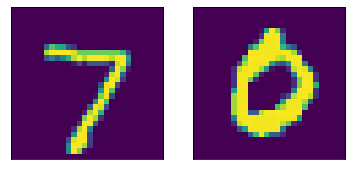

다른 숫자 입니다
tf.Tensor(16033.138, shape=(), dtype=float32)


In [23]:
idx = 2
display(idx)
test_img = test_dataset[idx]
vector_f = model(np.array([test_img[0]], dtype=np.float32))
vector_s = model(np.array([test_img[1]], dtype=np.float32))

distance = tf.reduce_mean(tf.square(vector_f - vector_s))
print(distance)

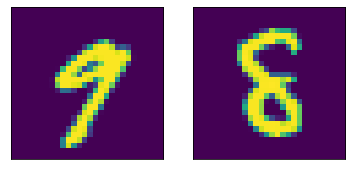

다른 숫자 입니다
tf.Tensor(7462.496, shape=(), dtype=float32)


In [24]:
idx = 20001
display(idx)
test_img = test_dataset[idx]
vector_f = model(np.array([test_img[0]], dtype=np.float32))
vector_s = model(np.array([test_img[1]], dtype=np.float32))

distance = tf.reduce_mean(tf.square(vector_f - vector_s))
print(distance)

### 같은 숫자

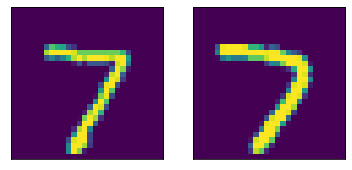

같은 숫자 입니다
tf.Tensor(0.0, shape=(), dtype=float32)


In [25]:
idx = 16
display(idx)
test_img = test_dataset[idx]
vector_f = model(np.array([test_img[0]], dtype=np.float32))
vector_s = model(np.array([test_img[1]], dtype=np.float32))

distance = tf.reduce_mean(tf.square(vector_f - vector_s))
print(distance)

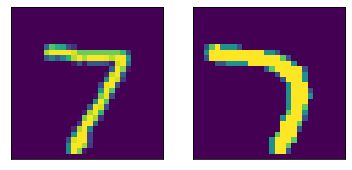

같은 숫자 입니다
tf.Tensor(0.0, shape=(), dtype=float32)


In [26]:
idx = 59
display(idx)
test_img = test_dataset[idx]
vector_f = model(np.array([test_img[0]], dtype=np.float32))
vector_s = model(np.array([test_img[1]], dtype=np.float32))

distance = tf.reduce_mean(tf.square(vector_f - vector_s))
print(distance)

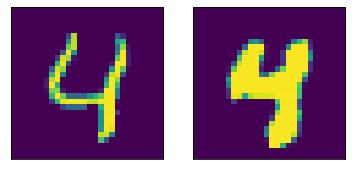

같은 숫자 입니다
tf.Tensor(1842.8264, shape=(), dtype=float32)


In [27]:
idx = 4033
display(idx)
test_img = test_dataset[idx]
vector_f = model(np.array([test_img[0]], dtype=np.float32))
vector_s = model(np.array([test_img[1]], dtype=np.float32))

distance = tf.reduce_mean(tf.square(vector_f - vector_s))
print(distance)